In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("./hdata.csv")

                    State  VotingPercentage
0                 Hamburg              80.0
1                 Bavaria              75.0
2      Schleswig-Holstein              72.0
3  North Rhine-Westphalia              71.0
4       Baden-Württemberg              70.0
Index(['State', 'VotingPercentage'], dtype='object')


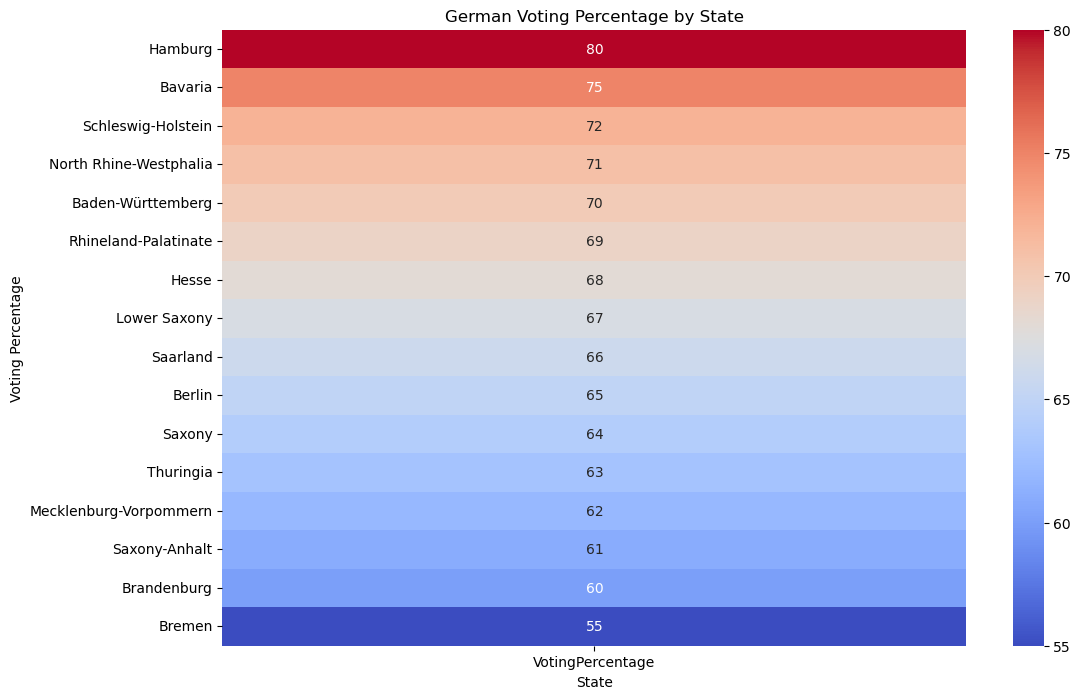

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./hdata.csv')

# Inspect the DataFrame
print(df.head())
print(df.columns)

# Set the index to 'State'
df.set_index('State', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True)

plt.title("German Voting Percentage by State")
plt.xlabel("State")
plt.ylabel("Voting Percentage")
plt.xticks(rotation=0)
plt.show()



In [27]:
""" import geopandas as gpd

# Path to the shapefile components
shapefile_path = './de_shp'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Inspect the GeoDataFrame to understand its structure
print(gdf.head())
print(gdf.columns)

 """


" import geopandas as gpd\n\n# Path to the shapefile components\nshapefile_path = './de_shp'\n\n# Load the shapefile\ngdf = gpd.read_file(shapefile_path)\n\n# Inspect the GeoDataFrame to understand its structure\nprint(gdf.head())\nprint(gdf.columns)\n\n "

In [28]:
import pandas as pd
import folium
import json

# Load the voting data
voting_data = pd.read_csv('./hdata.csv')
voting_data['State'] = voting_data['State'].str.lower()

# Load the GeoJSON file
with open('./de.json', 'r') as file:
    geojson_data = json.load(file)

# Add voting data to the GeoJSON
for feature in geojson_data['features']:
    state_name = feature['properties']['name'].lower()  # Adjust according to your GeoJSON structure
    if state_name in voting_data['State'].values:
        voting_percentage = voting_data[voting_data['State'] == state_name]['VotingPercentage'].values[0]
        feature['properties']['voting_percentage'] = voting_percentage
    else:
        feature['properties']['voting_percentage'] = None

        
# Initialize the folium map
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Define a color scale
def get_color(voting_percentage):
    if voting_percentage is None:
        return '#8c8c8c'  # Gray for missing data
    elif voting_percentage >= 75:
        return '#800026'  # Dark red
    elif voting_percentage >= 70:
        return '#BD0026'  # Red
    elif voting_percentage >= 65:
        return '#E31A1C'  # Light red
    elif voting_percentage >= 60:
        return '#FC4E2A'  # Orange
    else:
        return '#FEB24C'  # Yellow

# Add the GeoJSON data to the map
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['voting_percentage']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'voting_percentage'],
        aliases=['State', 'Voting Percentage'],
        localize=True
    )
).add_to(m)

# Display the map
m.save('german_voting_map.html')

